<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP3/TP3_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

#Utilidad
from sklearn.model_selection import train_test_split

In [2]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.head()

Unnamed: 0  acousticness  ...      song_title            artist
0           0        0.0102  ...        Mask Off            Future
1           1        0.1990  ...         Redbone  Childish Gambino
2           2        0.0344  ...    Xanny Family            Future
3           3        0.6040  ...  Master Of None       Beach House
4           4        0.1800  ...  Parallel Lines       Junior Boys

[5 rows x 17 columns]

In [3]:
attributes_spotify.describe()

Unnamed: 0  acousticness  ...      valence       target
count  2017.000000   2017.000000  ...  2017.000000  2017.000000
mean   1008.000000      0.187590  ...     0.496815     0.505702
std     582.402066      0.259989  ...     0.247195     0.500091
min       0.000000      0.000003  ...     0.034800     0.000000
25%     504.000000      0.009630  ...     0.295000     0.000000
50%    1008.000000      0.063300  ...     0.492000     1.000000
75%    1512.000000      0.265000  ...     0.691000     1.000000
max    2016.000000      0.995000  ...     0.992000     1.000000

[8 rows x 15 columns]

La idea ahora es aplicar el mismo procedimiento que antes pero ya no en 2D sino en 13D

Primero voy a evitar utilizar nombre y artista aunque podría de alguna forma extender este procedimiento otorgandole un numero a cada artista: 
ej: the beatles = 0, rolling stone = 1, etc)

Grafico algunas componentes para ver si se observa algun comportamiento peculiar en ellas.

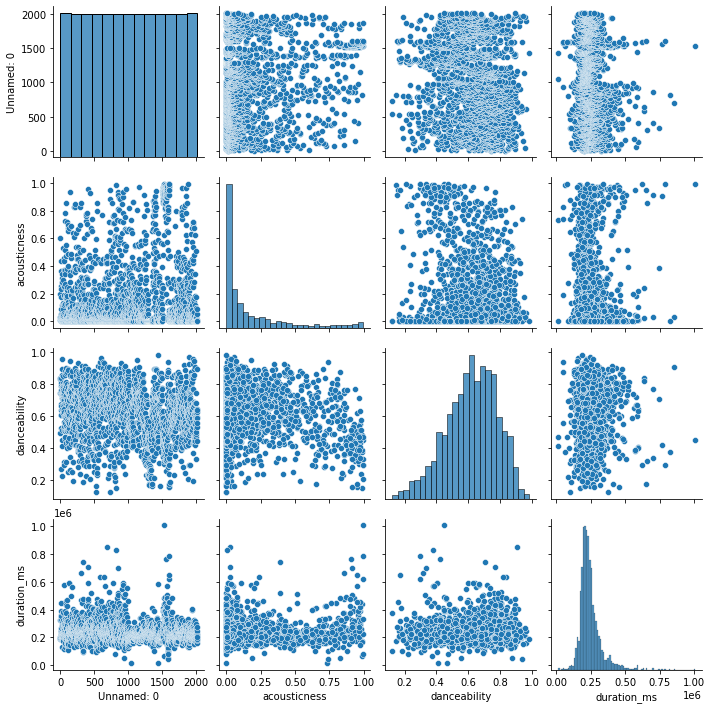

In [4]:
sns.pairplot(attributes_spotify[['Unnamed: 0',	'acousticness',	'danceability',	'duration_ms']])

Aplico StandarScalert de scikit-learn para normalizar mis datos.

In [5]:
from sklearn.preprocessing import StandardScaler

#creo un data frame solo con la informacion que me interesa
#y lo transformo a numpy para simplicidad al usar scikitlearn

data = attributes_spotify
y = data['target']

data = data.drop(columns = ['target', 'song_title', 'artist'])

X = data.to_numpy()
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [6]:
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

N = data.shape[0]

sqrtN = int(N ** 0.5)

print('N = ', N)
print('sqrtN = ', sqrtN)

n_neighbors= np.arange(1, sqrtN+2,4)

print('n_neighbors =', n_neighbors)

p = [1,2]

param_grid = dict(n_neighbors=n_neighbors, p=p)


knn = KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv = 10,)


gs_result = gs.fit(X_train, y_train)

N =  2017
sqrtN =  44
n_neighbors = [ 1  5  9 13 17 21 25 29 33 37 41 45]


In [8]:
#Print The value of best Hyperparameters
print('Best p:', gs_result.best_estimator_.get_params()['p'])
print('Best n_neighbors:',gs_result.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


In [9]:
knn = KNeighborsClassifier(n_neighbors=gs_result.best_estimator_.get_params()['n_neighbors'],
                           p=gs_result.best_estimator_.get_params()['p'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [10]:
from sklearn import metrics
#Predigo usando X_test
y_predicted = knn.predict(X_test)

print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       492
           1       0.98      0.90      0.94       517

    accuracy                           0.94      1009
   macro avg       0.94      0.94      0.94      1009
weighted avg       0.94      0.94      0.94      1009




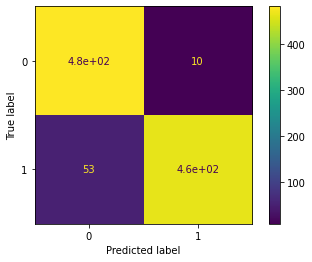

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_predicted)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [12]:
n = 2  # for 2 random indices
index = np.random.choice(X_test.shape[0], n, replace=False)

X_pred = X_test[index]
y_pred = y_test[index]

In [13]:
# hacemos la predicción
target_names =  ['dislike', 'like']

asd = knn.predict(X_pred)

for l in range(asd.shape[0]):
  print("Expected target: ", target_names[asd[l]])
  print('Target value: ', target_names[y_pred[l]])
  print("\n")

Expected target:  dislike
Target value:  dislike


Expected target:  dislike
Target value:  dislike




Ahora repitiré el trabajo pero transformando la columna "artist" de *categorical* a *numerical*

In [14]:
attributes_spotify["artist"].value_counts()

Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Polina              1
Prince Rama         1
!!!                 1
Western Tink        1
Tove Lo             1
Name: artist, Length: 1343, dtype: int64

Vemos que si bien se repiten algunos artistas, son los menos. Por lo que esta opción podría ser que no mejore el rendimiento considerablemente pero perjudique a la velocidad de ejecución.

In [15]:
newData = pd.get_dummies(attributes_spotify, columns=["artist"])

newData.head()

Unnamed: 0  acousticness  ...  artist_카우칩스 The CowChips  artist_플랫핏 Flat Feet
0           0        0.0102  ...                         0                     0
1           1        0.1990  ...                         0                     0
2           2        0.0344  ...                         0                     0
3           3        0.6040  ...                         0                     0
4           4        0.1800  ...                         0                     0

[5 rows x 1359 columns]

Ahora repito el procedimiento.

In [16]:
#creo un data frame solo con la informacion que me interesa
#y lo transformo a numpy para simplicidad al usar scikitlearn
y = newData['target']

newData = newData.drop(columns = ['target', 'song_title'])

X = newData.to_numpy()
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [17]:
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [18]:
N = newData.shape[0]

sqrtN = int(N ** 0.5)

print('N = ', N)
print('sqrtN = ', sqrtN)

n_neighbors= np.arange(1, sqrtN+2,4)

print('n_neighbors =', n_neighbors)

p = [1,2]

param_grid = dict(n_neighbors=n_neighbors, p=p)


knn = KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv = 10,)


gs_result = gs.fit(X_train, y_train)

N =  2017
sqrtN =  44
n_neighbors = [ 1  5  9 13 17 21 25 29 33 37 41 45]


In [19]:
#Print The value of best Hyperparameters
print('Best p:', gs_result.best_estimator_.get_params()['p'])
print('Best n_neighbors:',gs_result.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 21


In [20]:
knn = KNeighborsClassifier(n_neighbors=gs_result.best_estimator_.get_params()['n_neighbors'],
                           p=gs_result.best_estimator_.get_params()['p'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=1,
                     weights='uniform')

In [21]:
#Predigo usando X_test
y_predicted = knn.predict(X_test)

print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=1,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       492
           1       0.89      0.98      0.93       517

    accuracy                           0.92      1009
   macro avg       0.93      0.92      0.92      1009
weighted avg       0.93      0.92      0.92      1009




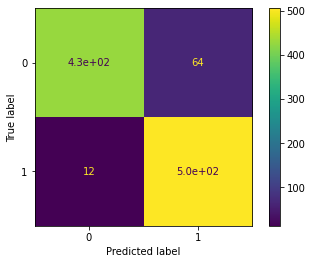

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_predicted)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

Se puede observar una disminucion en el accuracy. Y un aumento considerable del tiempo de entrenamiento.